## 1: Clustering Coefficient.

In [26]:
import networkx as nx 
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite

G = nx.Graph()
G.add_edges_from([('A','K') , ('A','B'),('A','C'),('B','C'),('B','K'),
                 ('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),
                 ('I','J')])

print(nx.clustering(G,'A'))
print(nx.clustering(G,'F'))
print(nx.clustering(G,'J'))

0.6666666666666666
0.3333333333333333
0.0


In [27]:
# clustering coefficient for each node in the Network.
nx.clustering(G)

{'A': 0.6666666666666666,
 'B': 0.6666666666666666,
 'C': 0.3333333333333333,
 'D': 0.0,
 'E': 0.16666666666666666,
 'F': 0.3333333333333333,
 'G': 0.0,
 'H': 0.0,
 'I': 0.0,
 'J': 0.0,
 'K': 1.0}

In [28]:
# global clustering coefficient for the whole network.
# Approch 1:
print(nx.average_clustering(G))
# Approch 2:
print(nx.transitivity(G))

0.28787878787878785
0.4090909090909091


## 2: Distance Measures.

In [47]:
G = nx.Graph()
G.add_edges_from([('A','K') , ('A','B'),('B','K'),('B','C'),
                 ('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),
                  ('E','I'),('I','J')])

In [48]:
# get the distance between two nodes:
nx.shortest_path(G,'A','H')

['A', 'B', 'C', 'E', 'H']

In [49]:
# calculate the path by how many edges to reach the node.
nx.shortest_path_length(G,'A','H')

4

In [50]:
# To find the distance between the node A and all other nodes we need 
# to use Breadth-First Search:
T = nx.bfs_tree(G,'A')
T.edges()

[('A', 'K'),
 ('A', 'B'),
 ('B', 'C'),
 ('C', 'E'),
 ('C', 'F'),
 ('E', 'D'),
 ('E', 'H'),
 ('E', 'I'),
 ('F', 'G'),
 ('I', 'J')]

In [51]:
# So, we can easily know the distance from A and all other nodes using 
# shortest_path_length() which built upon the bfs_tree .
nx.shortest_path_length(G,'A')

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 1}

In [52]:
# How to characterize the distance between all pairs of nodes in a graph?
# by averaging the distance between every pair of nodes.
nx.average_shortest_path_length(G)

2.5272727272727273

In [53]:
nx.diameter(G)

5

In [56]:
# The Eccentricity of node n:
# the largest distance between n & and all other nodes.
nx.eccentricity(G)

{'A': 5,
 'B': 4,
 'C': 3,
 'D': 4,
 'E': 3,
 'F': 3,
 'G': 4,
 'H': 4,
 'I': 4,
 'J': 5,
 'K': 5}

In [57]:
# The Radius of a graph: the minimun eccentricity.
nx.radius(G)

3

In [58]:
# periphery:
nx.periphery(G)

['A', 'K', 'J']

In [59]:
# Center:
nx.center(G)

['C', 'E', 'F']

### Karate Club Network.

In [61]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G,first_label =1)

In [62]:
# Average shortest path:
nx.average_shortest_path_length(G)

2.408199643493761

In [ ]:
# Radius:
nx.radius(G)

In [63]:
# Diameter:
nx.diameter(G)

5

In [64]:
# Center:
nx.center(G)

[1, 2, 3, 4, 9, 14, 20, 32]

In [65]:
# periphery:
nx.periphery(G)

[17, 15, 16, 19, 21, 23, 24, 30, 27]

# 3: Connected Components.
**1st : in undirected Graph**

In [ ]:
# To check the connectivity of undirected graph.
nx.is_connected(G)

In [ ]:
# To get the number of connected components in a graph.
nx.number_connected_components(G)

In [ ]:
# To get the nodes that form this connected components in a graph.
sorted(nx.connected_components(G))

In [ ]:
# to get the nodes that form a connected components given a particular node.
nx.node_connected_component(G,'M')

**2nd : in directed Graph**

In [ ]:
# To check if directed graph is STRONGLY connected.
nx.is_strongly_connected(G)

# To know what are the strongly connected components in a graph?
sorted(nx.strongly_connected_components(G))

In [ ]:
# To check if directed graph is WEAKLY connected.
nx.is_weakly_connected(G)

# 4: Network Robustness.
**Undirected Graph**

In [5]:
import networkx as nx 
G_un = nx.Graph()
G_un.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'),
                     ('A', 'N'),
                  ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'),
                  ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'),
                  ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'),
                  ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'),
                  ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])

In [7]:
# To know the smallest num of `NODES` to be removed to disconnect the network.
nx.node_connectivity(G_un)

1

In [8]:
# which node in particular ?
nx.minimum_node_cut(G_un)

{'A'}

In [9]:
# To know the smallest num of `EDGES` to be removed to disconnect the network.
nx.edge_connectivity(G_un)

2

In [10]:
# Which edges in particular?
nx.minimum_edge_cut(G_un)

{('G', 'A'), ('N', 'A')}

**Directed Graph**

In [11]:
import networkx as nx 

G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'E'), ('G', 'A'), ('A', 'N'),
                  ('B', 'C'), ('D', 'B'), ('B', 'E'), ('C', 'D'), ('E', 'C'),
                  ('D', 'E'), ('E', 'D'), ('F', 'G'), ('I', 'F'), ('J', 'F'),
                  ('H', 'G'), ('I', 'G'), ('G', 'J'), ('I', 'H'), ('H', 'I'),
                  ('I', 'J'), ('J', 'O'), ('O', 'J'), ('K', 'M'), ('K', 'L'),
                  ('O', 'K'), ('O', 'L'), ('N', 'L'), ('L', 'M'), ('N', 'O')])

In [12]:
# if we want to deliver a message from `G` to `L` 
# what are the pathes available to do so ?
sorted(nx.all_simple_paths(G,'G','L'))

[['G', 'A', 'N', 'L'],
 ['G', 'A', 'N', 'O', 'K', 'L'],
 ['G', 'A', 'N', 'O', 'L'],
 ['G', 'J', 'O', 'K', 'L'],
 ['G', 'J', 'O', 'L']]

In [13]:
# if we want to block the message from being delivered.
# How many NODES that need to be removed in order to do so?
nx.node_connectivity(G,'G','L')

2

In [15]:
# which NODES are they?
nx.minimum_node_cut(G,'G','L')

{'N', 'O'}

In [16]:
# if we want to block the message from being delivered.
# How many EDGES that need to be removed in order to do so?
nx.edge_connectivity(G,'G','L')

2

In [17]:
# which EDGES are they?
nx.minimum_edge_cut(G,'G','L')

{('A', 'N'), ('J', 'O')}

# 5 : `TA Demonstration` : Simple Network Visualizations in NetworkX.

read_gpickle(path):

- Read graph object in Python pickle format.
- Pickles are a serialized byte stream of a Python object. This format will preserve Python objects used as nodes or edges.

In [3]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


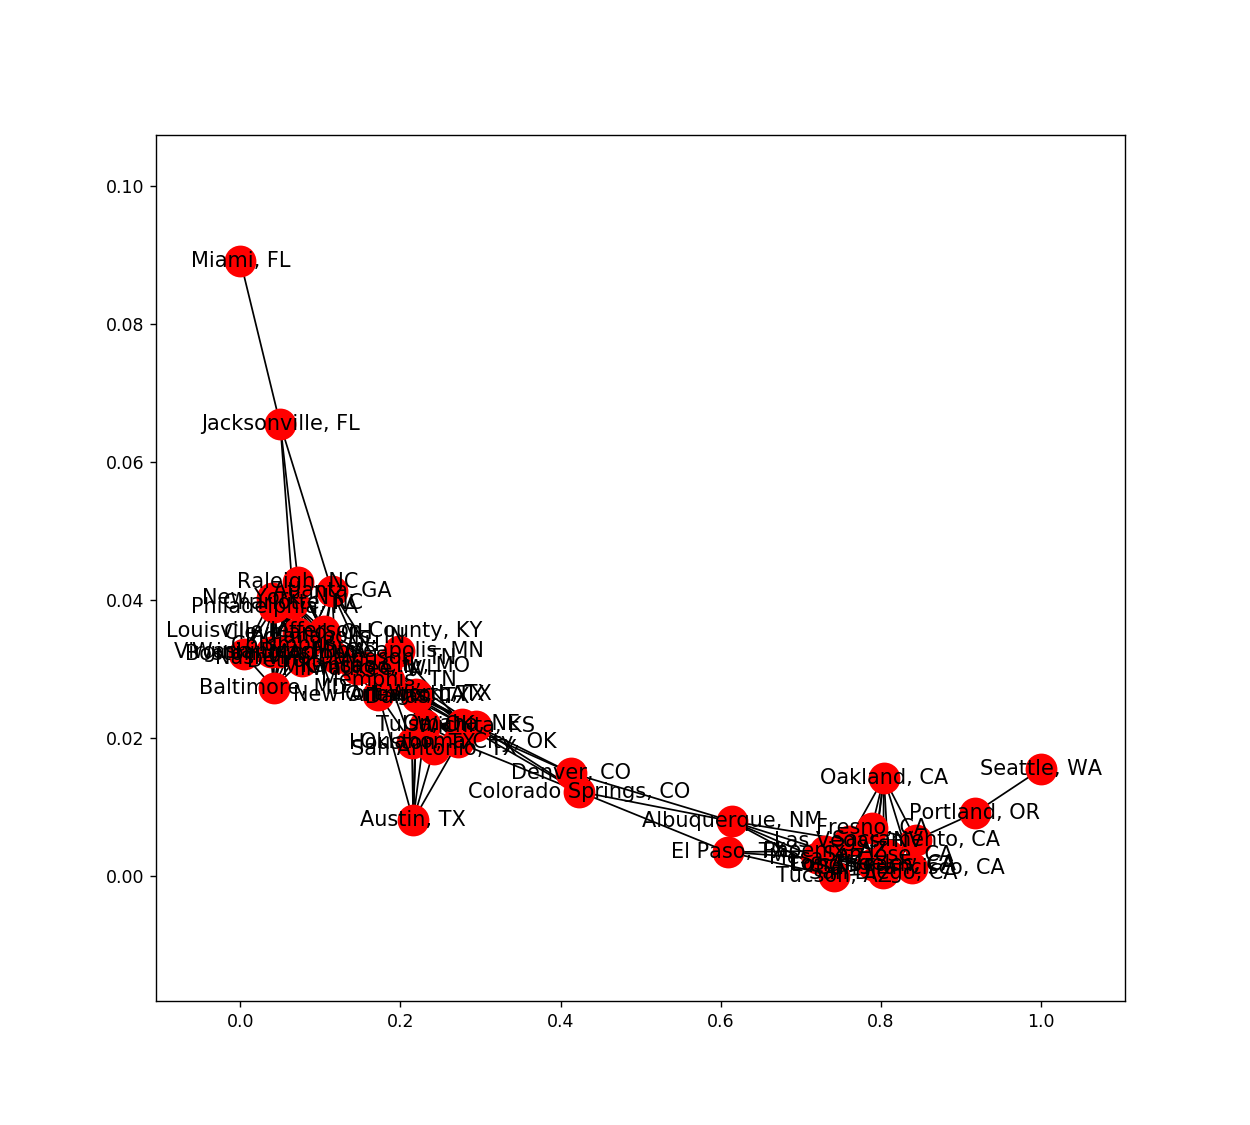

In [4]:
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

- Notice the positioning of the notes provides us with some insight on the structure of our network although this layout might not be the best one for us to use. One of the largest challenges when visualizing networks is figuring out where the nodes should be positioned.
- NetworkX offers a few node positioning algorithms to help create layouts for the network visualization. For example, draw NetworkX uses the spring layout by default, which tries to position nodes with as few crossing edges as possible while keeping edge length similar.

Using less comprehension we can see what layouts NetworkX provides us with.

In [5]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

**random_layout**

<IPython.core.display.Javascript object>


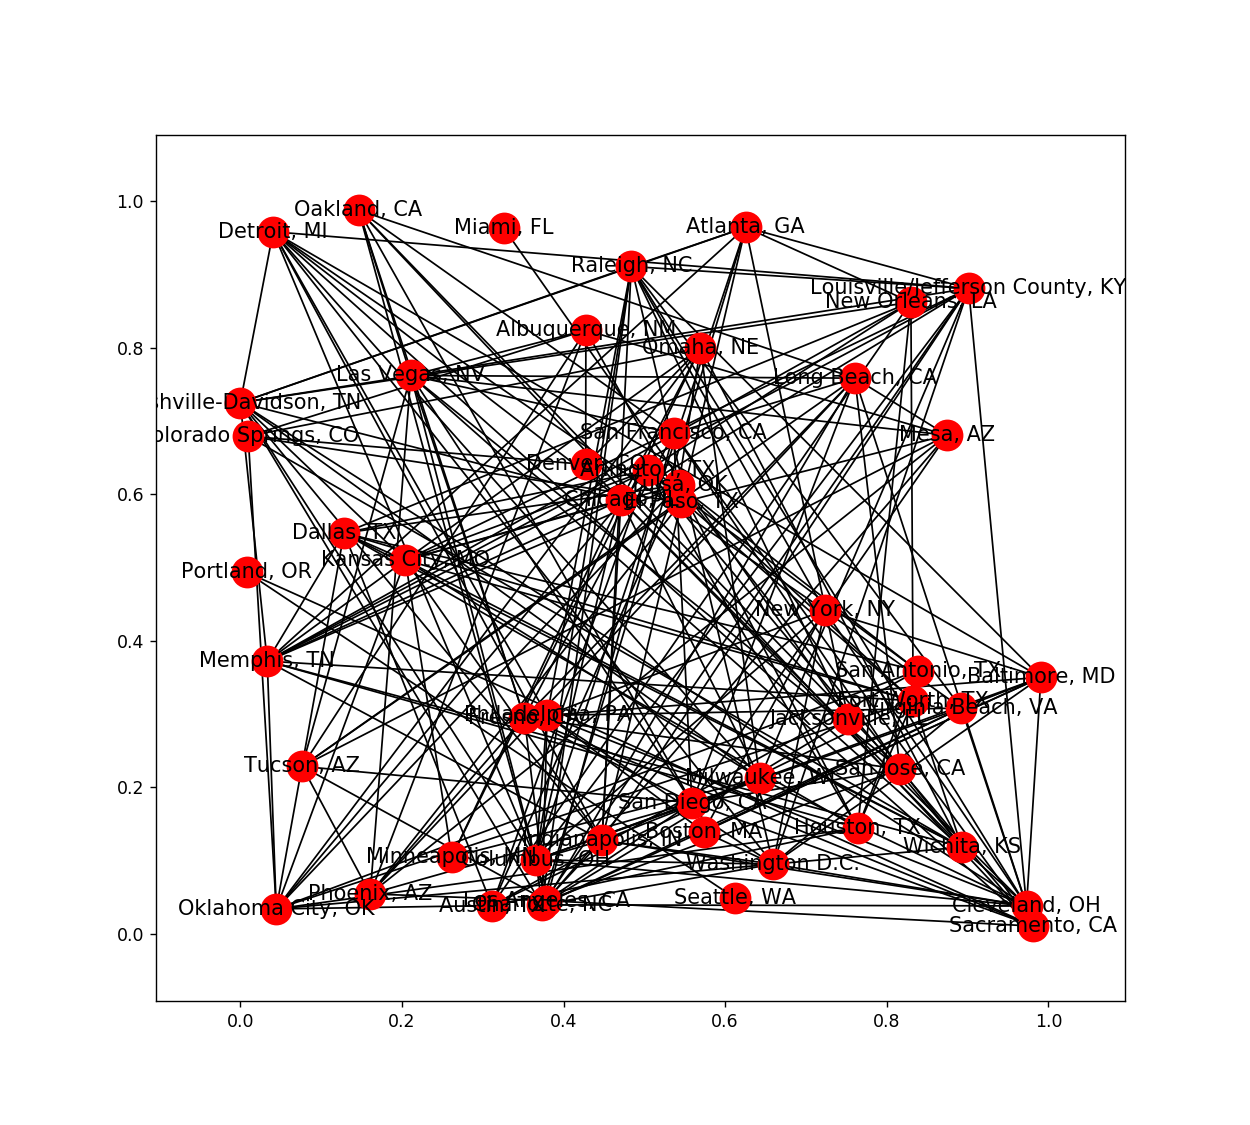

In [6]:
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G , pos)

**circular_layout**

<IPython.core.display.Javascript object>


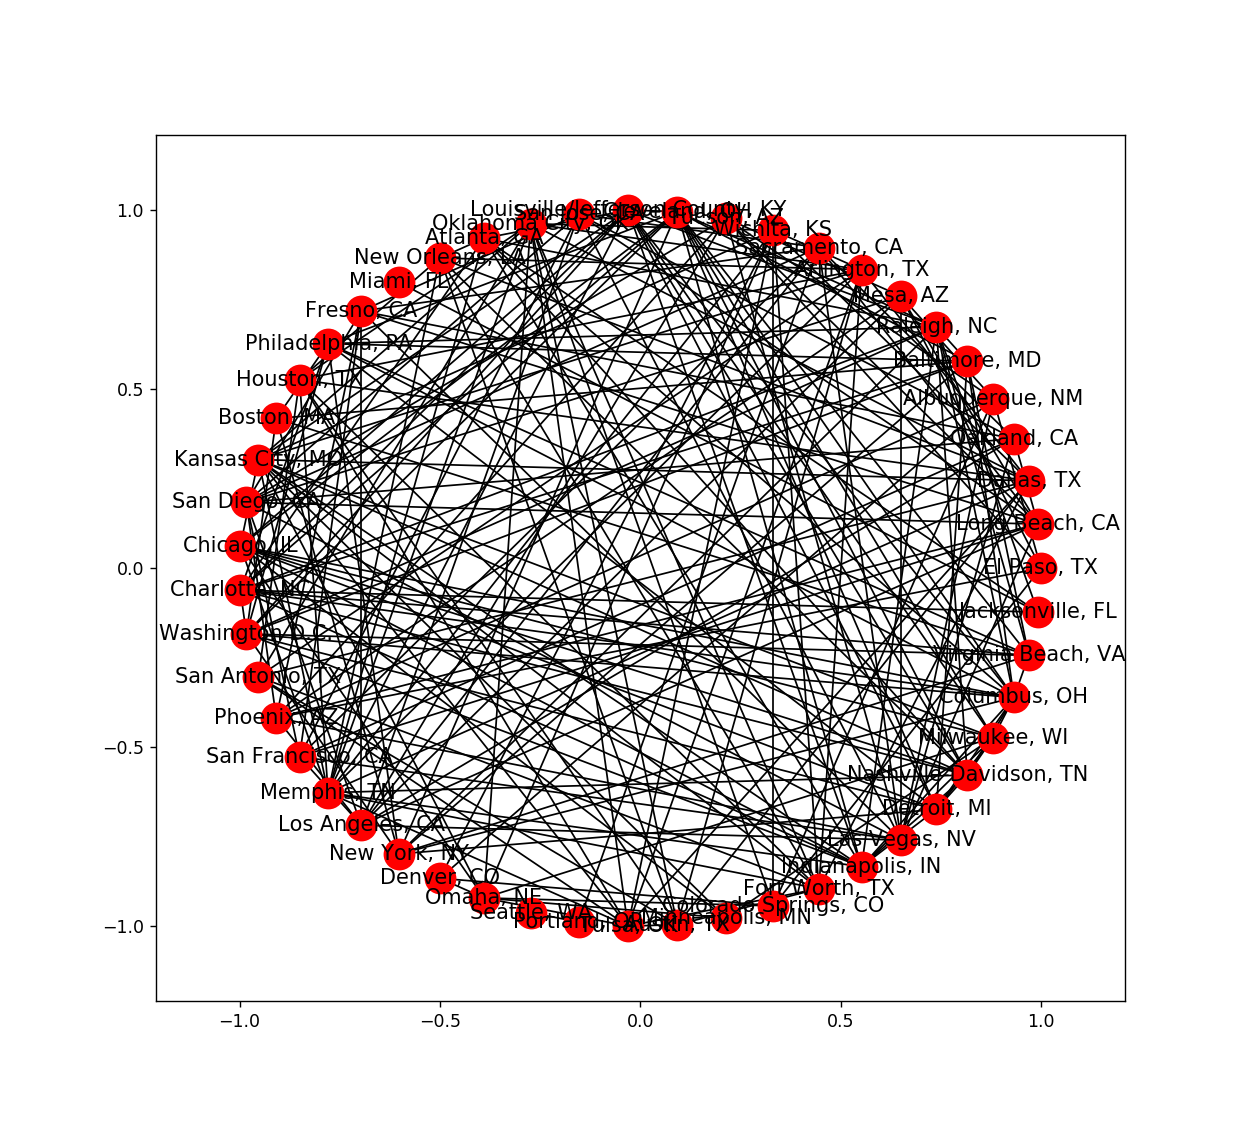

In [7]:
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G , pos)

- Although circular layout gives us very different looking positions by placing the nodes in a circle. Which layout is best to use is heavily dependent on the characteristics of the network. So trying out various layouts can be very important when creating a visualization. 

You can also use your own layout by passing in a dictionary of node positions. Our distribution network actually has a node attribute of location which we can use for the position.

<IPython.core.display.Javascript object>


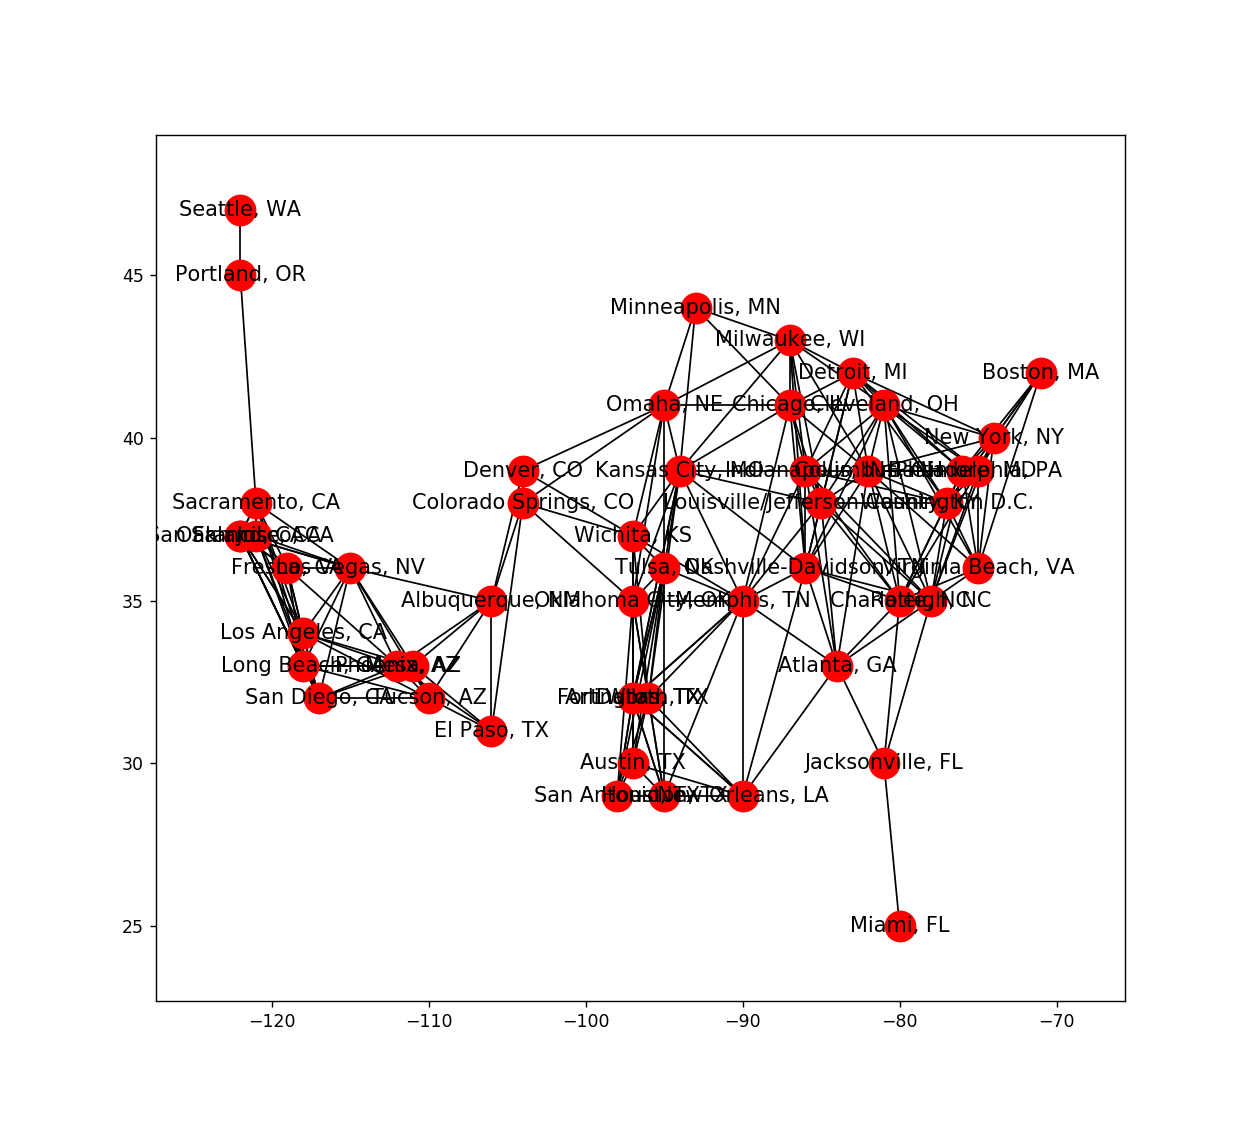

In [8]:
plt.figure(figsize=(10,9))

pos = nx.get_node_attributes(G,'location')
nx.draw_networkx(G,pos)

- If you're familiar with the locations of US cities, you may be able to now better recognize this network.

Next, let's try playing around with some of the parameters to see how we can change the look of our visualization. We can set the transparency with the alpha parameter, move labels and make the edges gray. Let's also turn the axis off and reduce padding.

<IPython.core.display.Javascript object>


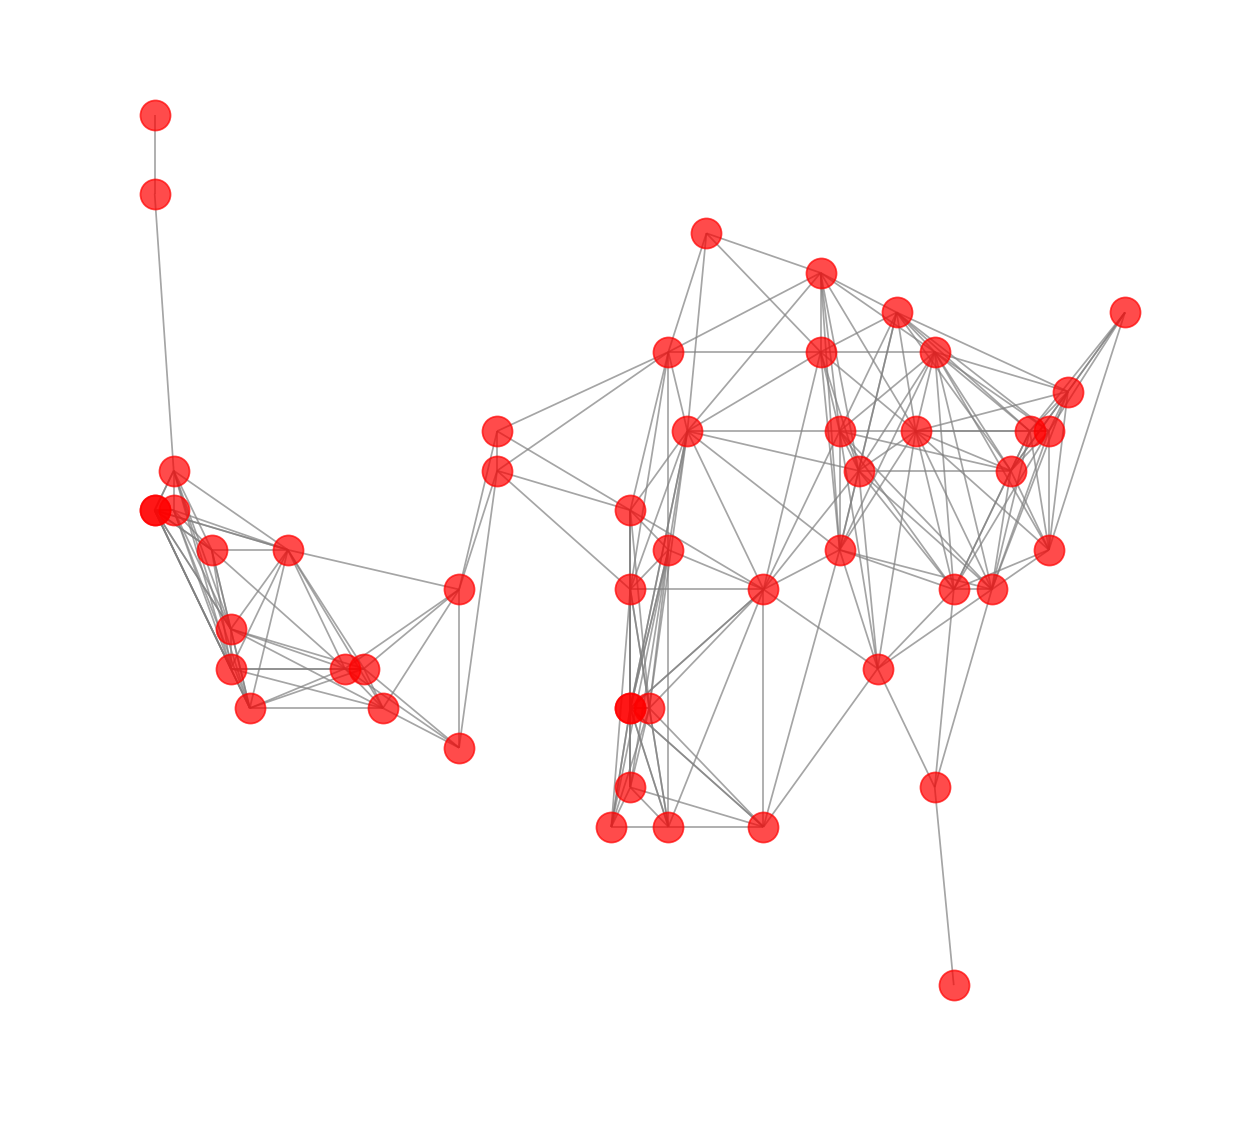

In [9]:
plt.figure(figsize=(10,9))

pos = nx.get_node_attributes(G,'location')
nx.draw_networkx(G,pos, alpha= 0.7 , with_labels=False ,edge_color='gray')

plt.axis("off")
plt.tight_layout();

-  Looking at our new figure, we can see that by removing some of the information we've made the structure of the network easier to see.


1. Now, let's see how to change the node color, node size and edge width. Let's set the node color based on the degree of the node, using this comprehension we can get a list of the degrees.
2. We'll set the node size based on the population of each node and multiply each value by a small number so that the nodes aren't too large.
3. We can also use this comprehension to get the weights or the costs of each edge to be used for the edge widths and also multiply this value by a small number so that the widths are appropriate.
4. Passing all of these into draw NetworkX and setting the color map to blue, we can see that we've created a pretty interesting visualization. 

<IPython.core.display.Javascript object>


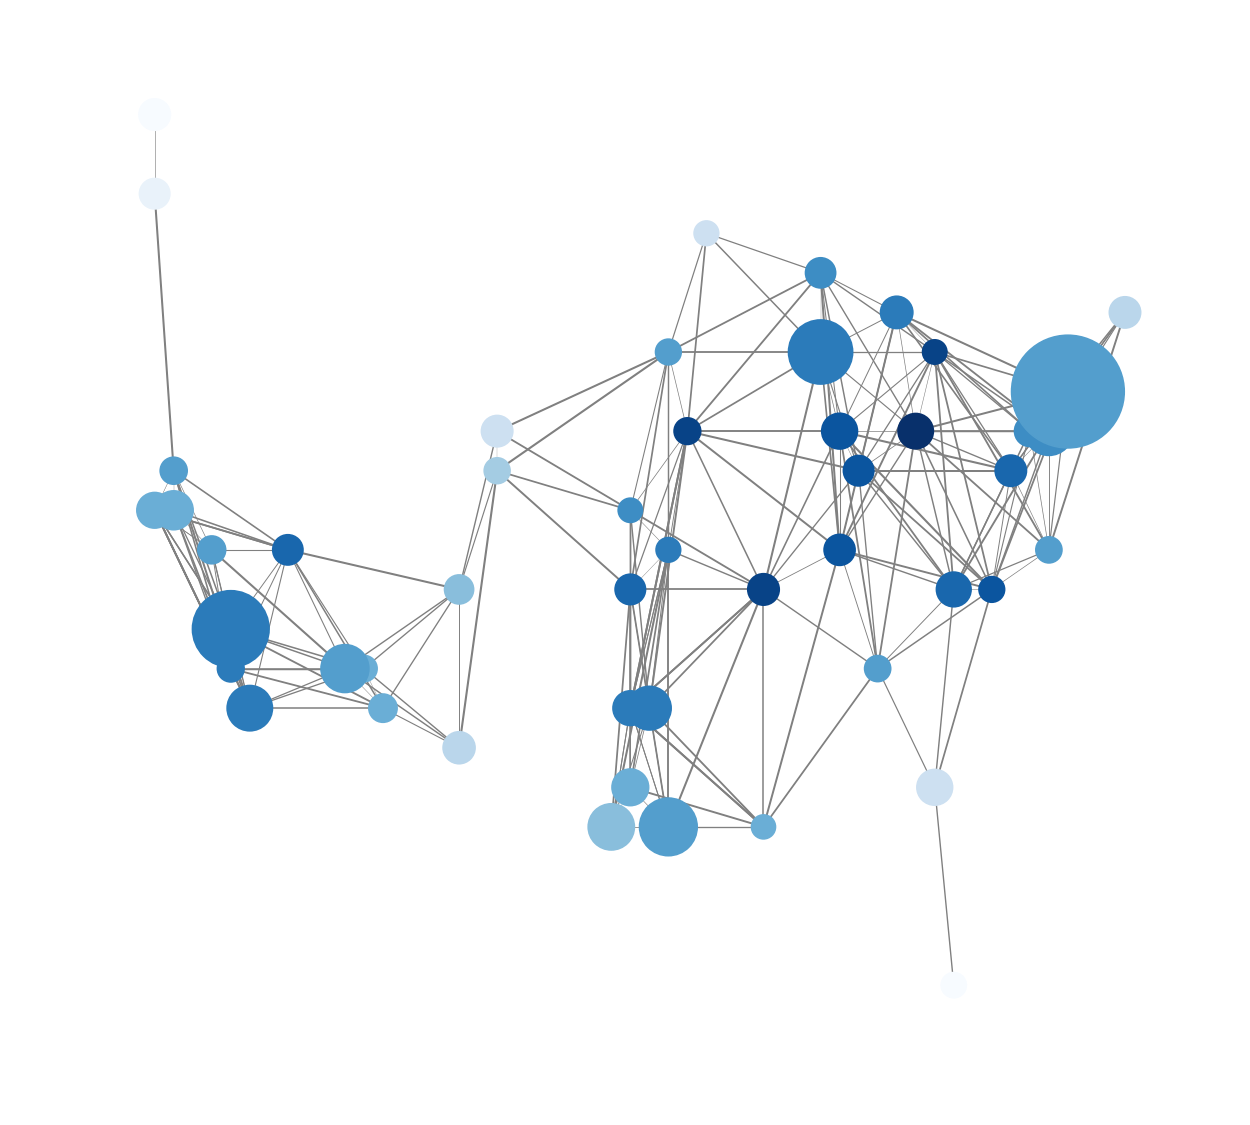

In [15]:
plt.figure(figsize=(10,9))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G,'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos , node_size=node_size , node_color= node_color,
                 with_labels = False , width = edge_width ,
                 edge_color='gray' , cmap= plt.cm.Blues)

plt.axis("off")
plt.tight_layout();

- we can see that we've created a pretty interesting visualization. Now, we can quickly see which nodes in our distribution network have high population or high degree.

**small investigation**

In [25]:
G.nodes(data = True)[:5]

[('El Paso, TX', {'location': (-106, 31), 'population': 674433}),
 ('Long Beach, CA', {'location': (-118, 33), 'population': 469428}),
 ('Dallas, TX', {'location': (-96, 32), 'population': 1257676}),
 ('Oakland, CA', {'location': (-122, 37), 'population': 406253}),
 ('Albuquerque, NM', {'location': (-106, 35), 'population': 556495})]

In [24]:
G.edges(data = True)[:5]

[('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}),
 ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}),
 ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}),
 ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}),
 ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046})]

In [22]:
for u , v in G.edges():
    print(u)
    print(v)
    print(G[u][v]['weight'])
    print('\n')

El Paso, TX
Albuquerque, NM
367.88584356108345


El Paso, TX
Mesa, AZ
536.256659972679


El Paso, TX
Tucson, AZ
425.41386739988224


El Paso, TX
Phoenix, AZ
558.7835703774161


El Paso, TX
Colorado Springs, CO
797.7517116740046


Long Beach, CA
Oakland, CA
579.5829987228403


Long Beach, CA
Mesa, AZ
590.156204210031


Long Beach, CA
Sacramento, CA
611.0649790490104


Long Beach, CA
Tucson, AZ
698.6566667728368


Long Beach, CA
San Jose, CA
518.2330606219175


Long Beach, CA
Fresno, CA
360.4704577972272


Long Beach, CA
San Diego, CA
151.45008247402757


Long Beach, CA
Phoenix, AZ
567.4125390872786


Long Beach, CA
San Francisco, CA
585.6985397766858


Long Beach, CA
Los Angeles, CA
31.69419563651866


Long Beach, CA
Las Vegas, NV
385.2597725411484


Dallas, TX
Arlington, TX
29.425931317908415


Dallas, TX
Wichita, KS
548.0572491959326


Dallas, TX
Oklahoma City, OK
306.2597807397289


Dallas, TX
New Orleans, LA
711.0141469371868


Dallas, TX
Houston, TX
361.54185907832755


Dallas, TX


One last thing I would like to show you is how to plot edges, nodes or labels separately:

- Suppose we wanted to visually identify the most expensive edges in our network, say where the cost was greater than 770. We can use this comprehension to find the subset of edges with the weight larger than 770 and pass this into the edgeless perimeter of draw network edges. We also indicate that we want to highlight these edges with thick, semi-transparent, red lines. 
- Additionally, let's use draw NetworkX labels to add labels to Los Angeles and New York City.

<IPython.core.display.Javascript object>


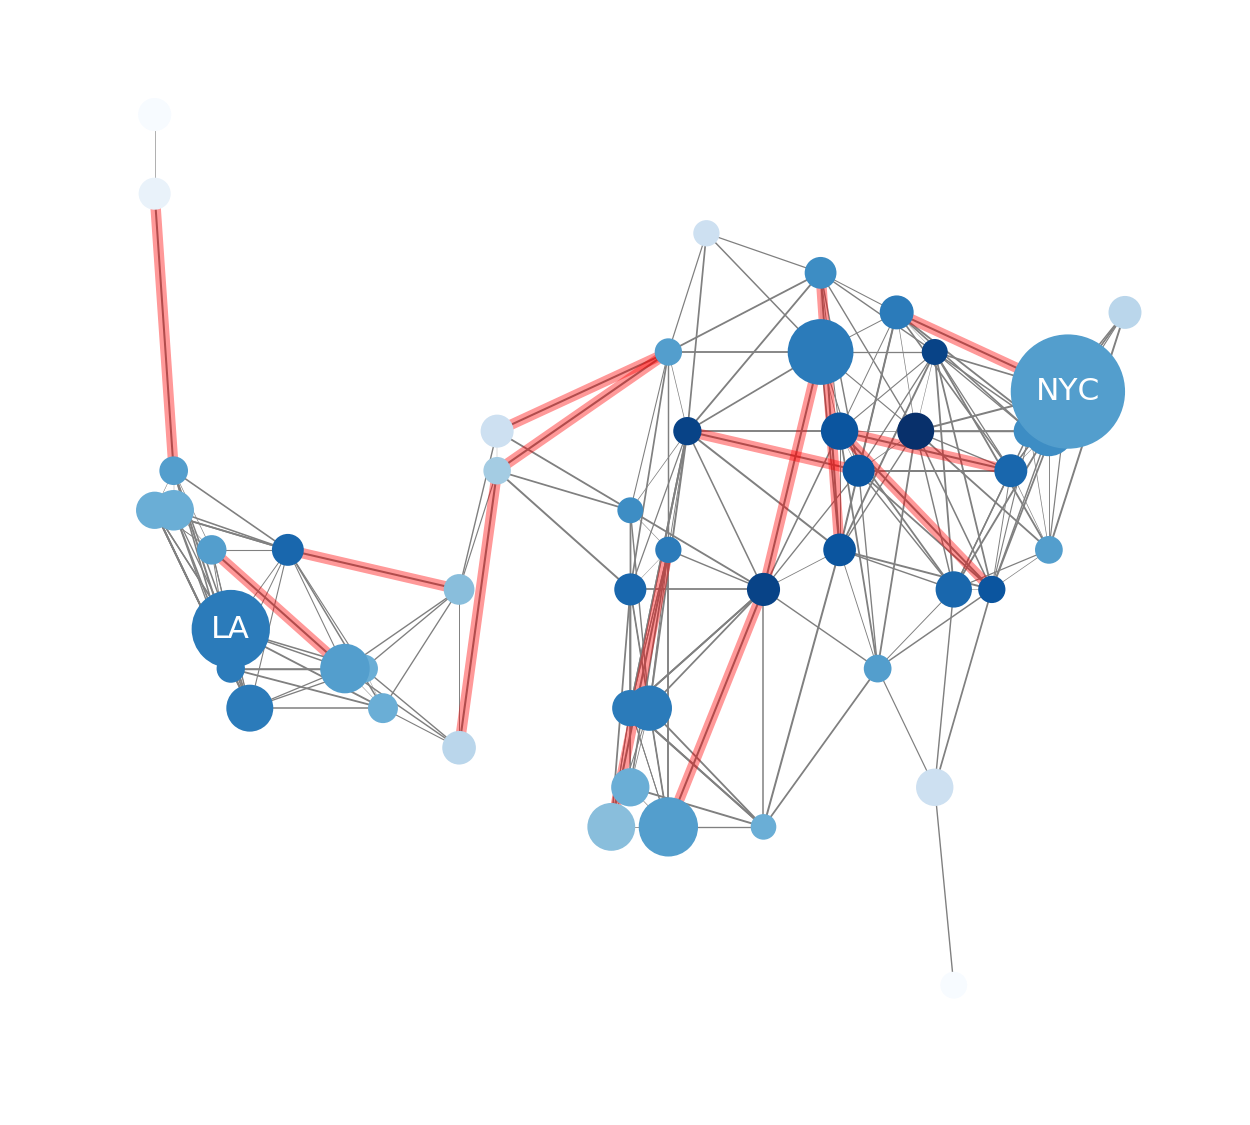

In [27]:
plt.figure(figsize=(10,9))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G,'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos , node_size=node_size , node_color= node_color,
                 with_labels = False , width = edge_width ,
                 edge_color='gray' , cmap= plt.cm.Blues)

greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G,pos , edgelist=greater_than_770,
                      edge_color = 'r' ,alpha = 0.4 ,width=6)

nx.draw_networkx_labels(G ,pos ,
                labels = {'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'},
                       font_size =18 , font_color ='w')

plt.axis("off")
plt.tight_layout();

- Looking at our network visualization by separately adding specific edges and labels, we can now clearly see the high cost edges as well as the locations of New York City and Los Angeles.

We've covered many of the tools NetworkX provides for network visualization. But remember you can always check the NetworkX documentation for additional information on drawing functions and their parameters. That wraps it up for this tutorial on visualizing networks in NetworkX. If you're interested in creating more in-depth visualizations of larger networks consider exploring some more fully featured graph visualization tools such as side escape, Gephi or Graphviz. 